In [1]:
from hiive.mdptoolbox import mdp, example
from utils import *

In [2]:
import gym, gym_walk, numpy as np
env = gym.make('WalkFive-v0')
pi = lambda x: np.random.randint(2)

In [3]:
env.observation_space.n

7

In [4]:
P, R = example.openai("WalkFive-v0", True)


[ABCDE]


/opt/homebrew/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:195: UserWarning: WARN: The result returned by `env.reset()` was not a tuple of the form `(obs, info)`, where `obs` is a observation and `info` is a dictionary containing additional information. Actual type: `<class 'int'>`
  logger.warn(
/opt/homebrew/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:272: UserWarning: WARN: No render modes was declared in the environment (env.metadata['render_modes'] is None or not defined), you may have trouble when calling `.render()`.
  logger.warn(


In [5]:
P

array([[[1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1.]],

       [[1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 1.]]])

In [6]:
R

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [0., 0.]])

In [7]:
q_learning = mdp.QLearning(P, R, 0.99, epsilon=0.0,epsilon_decay=.95, n_iter=10**6, alpha=0.95, skip_check=True)
q_learning.run()
q_learning.policy

(0, 1, 1, 1, 1, 1, 0)

In [8]:
from QLearning import QLearningAgent
agent = QLearningAgent("WalkFive-v0")
agent.solve()

/opt/homebrew/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:219: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(


1.0

In [9]:
q_learning

P: 
array([[1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.]])
array([[1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.]])

R: 
array([0., 0.])
array([0., 0.])

P: 
array([[1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.]])
array([[1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.]])

R: 
array([0., 0., 0., 0., 0., 0., 0.])
array([0., 0., 0., 0., 0., 1., 0.])

max mean v 0.7128585707144285


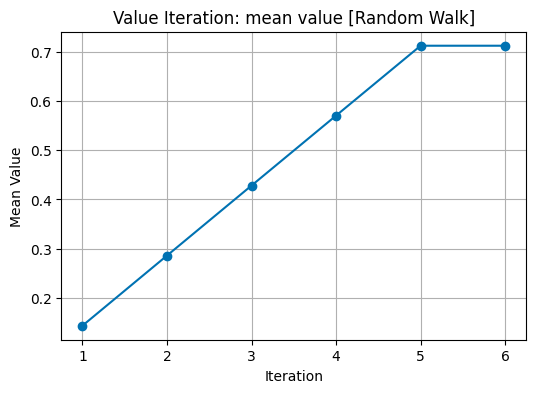

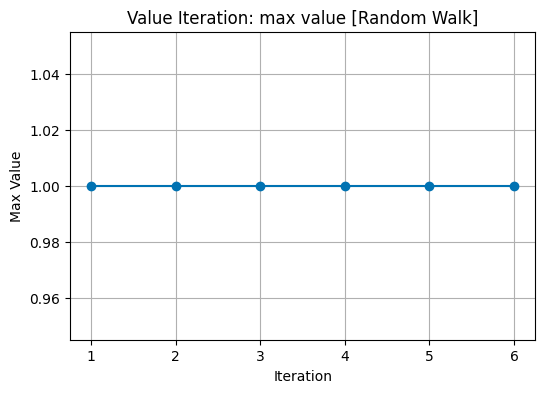

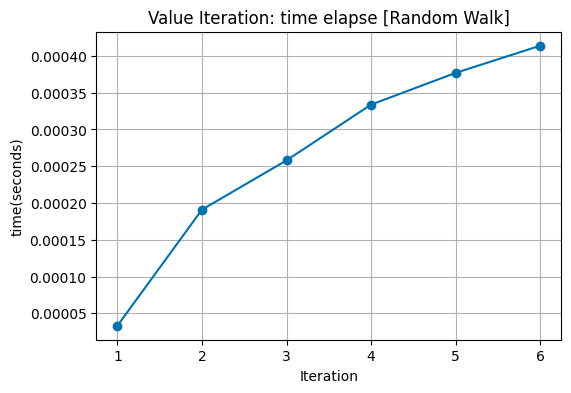

In [10]:
args = {"transitions":P, "reward":R, "gamma":0.999,"epsilon":0.1, "max_iter":10**5, "skip_check":True}
vi = mdp.ValueIteration(**args)
vi.run()
print(vi)
vi_result = record(vi.run_stats, ["Mean V", "Max V", "Iteration"])
num_iters = len(vi_result["Mean V"])
print("max mean v", max(vi_result["Mean V"]))
plot_data(vi_result["Iteration"], vi_result["Mean V"], 
                 "Iteration", "Mean Value", "Value Iteration: mean value [Random Walk]", figure_size=(6,4))
plot_data(vi_result["Iteration"], vi_result["Max V"], 
                 "Iteration", "Max Value", "Value Iteration: max value [Random Walk]", figure_size=(6,4))
plot_data(vi_result["Iteration"], vi_result["times"], 
                 "Iteration", "time(seconds)", "Value Iteration: time elapse [Random Walk]", figure_size=(6,4))


P: 
array([[1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.]])
array([[1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.]])

R: 
array([0., 0., 0., 0., 0., 0., 0.])
array([0., 0., 0., 0., 0., 1., 0.])

max mean v 0.7128585707144285


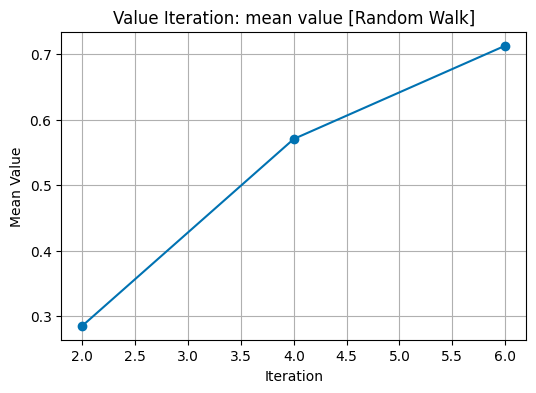

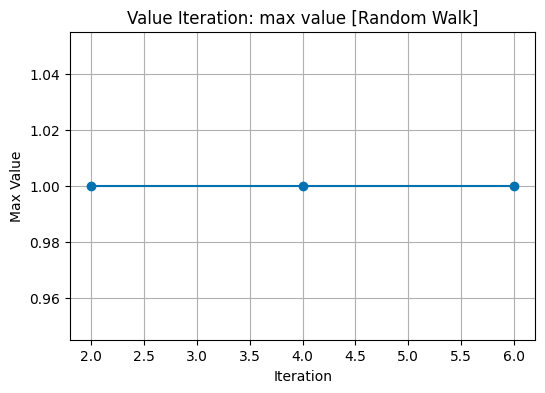

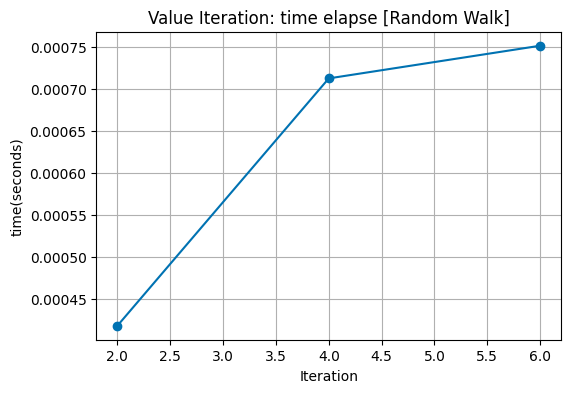

In [11]:
args = {"transitions":P, "reward":R, "gamma":0.999,"epsilon":10**(-10), "max_iter":10**5, "skip_check":True}
vi = mdp.ValueIteration(**args)
vi.run()
print(vi)
vi_result = record(vi.run_stats, ["Mean V", "Max V", "Iteration"])
num_iters = len(vi_result["Mean V"])
print("max mean v", max(vi_result["Mean V"]))
plot_data(vi_result["Iteration"], vi_result["Mean V"], 
                 "Iteration", "Mean Value", "Value Iteration: mean value [Random Walk]", figure_size=(6,4))
plot_data(vi_result["Iteration"], vi_result["Max V"], 
                 "Iteration", "Max Value", "Value Iteration: max value [Random Walk]", figure_size=(6,4))
plot_data(vi_result["Iteration"], vi_result["times"], 
                 "Iteration", "time(seconds)", "Value Iteration: time elapse [Random Walk]", figure_size=(6,4))


P: 
array([[1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.]])
array([[1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.]])

R: 
array([0., 0., 0., 0., 0., 0., 0.])
array([0., 0., 0., 0., 0., 1., 0.])

max mean v 0.7128585707144285


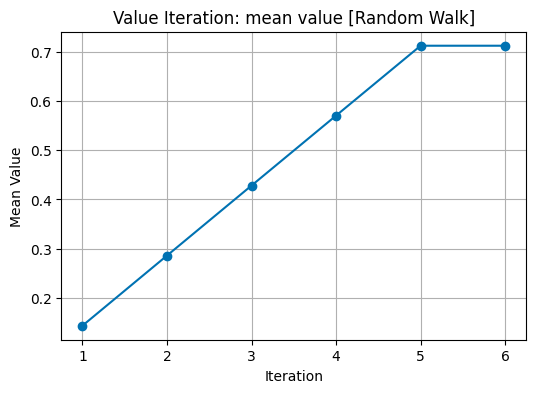

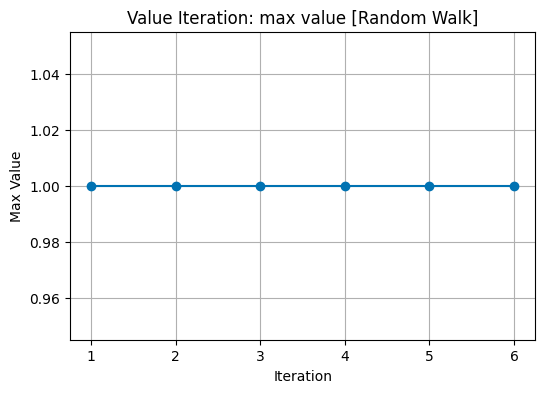

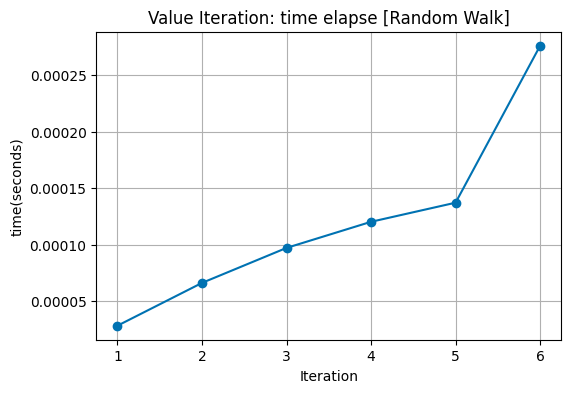

In [12]:
args = {"transitions":P, "reward":R, "gamma":0.999,"epsilon":0.1, "max_iter":10**5, "skip_check":True}
vi = mdp.ValueIteration(**args)
vi.run()
print(vi)
vi_result = record(vi.run_stats, ["Mean V", "Max V", "Iteration"])
num_iters = len(vi_result["Mean V"])
print("max mean v", max(vi_result["Mean V"]))
plot_data(vi_result["Iteration"], vi_result["Mean V"], 
                 "Iteration", "Mean Value", "Value Iteration: mean value [Random Walk]", figure_size=(6,4))
plot_data(vi_result["Iteration"], vi_result["Max V"], 
                 "Iteration", "Max Value", "Value Iteration: max value [Random Walk]", figure_size=(6,4))
plot_data(vi_result["Iteration"], vi_result["times"], 
                 "Iteration", "time(seconds)", "Value Iteration: time elapse [Random Walk]", figure_size=(6,4))

In [13]:
pi = mdp.PolicyIterationModified(P, R, 0.99999, epsilon=0.01, max_iter=10**6, skip_check=True)
pi.run()
pi.policy
print("pi.policy", pi.policy)

pi.policy (0, 1, 1, 1, 1, 1, 0)


In [ ]:
pi = mdp.PolicyIterationModified(P, R, 0.99999, epsilon=0.01, max_iter=10**6, skip_check=True)
pi.run()
pi.policy
print("pi.policy", pi.policy)

In [26]:
vi.run_stats

[{'State': None,
  'Action': None,
  'Reward': 1.0,
  'Error': 1.0,
  'Time': 2.8133392333984375e-05,
  'Max V': 1.0,
  'Mean V': 0.14285714285714285,
  'Iteration': 1},
 {'State': None,
  'Action': None,
  'Reward': 1.0,
  'Error': 0.999,
  'Time': 6.604194641113281e-05,
  'Max V': 1.0,
  'Mean V': 0.2855714285714286,
  'Iteration': 2},
 {'State': None,
  'Action': None,
  'Reward': 1.0,
  'Error': 0.998001,
  'Time': 9.703636169433594e-05,
  'Max V': 1.0,
  'Mean V': 0.428143,
  'Iteration': 3},
 {'State': None,
  'Action': None,
  'Reward': 1.0,
  'Error': 0.997002999,
  'Time': 0.0001201629638671875,
  'Max V': 1.0,
  'Mean V': 0.5705719998571429,
  'Iteration': 4},
 {'State': None,
  'Action': None,
  'Reward': 1.0,
  'Error': 0.996005996001,
  'Time': 0.00013709068298339844,
  'Max V': 1.0,
  'Mean V': 0.7128585707144285,
  'Iteration': 5},
 {'State': None,
  'Action': None,
  'Reward': 1.0,
  'Error': 0.0,
  'Time': 0.0002760887145996094,
  'Max V': 1.0,
  'Mean V': 0.7128585707

In [24]:
pi

P: 
array([[1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.]])
array([[1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.]])

R: 
array([0., 0., 0., 0., 0., 0., 0.])
array([0., 0., 0., 0., 0., 1., 0.])

In [23]:
pi.run_stats

In [21]:
pi = mdp.PolicyIterationModified(P, R, 0.9999, epsilon=0.01, max_iter=10**6, skip_check=True)
pi.run()
print(pi)
pi_result = record(pi.run_stats, ["Mean V", "Max V"])
num_iters = len(pi_result["Mean V"])
print("max mean v", max(pi_result["Mean V"]))
plot_data(pi_result["Iteration"], pi_result["Mean V"], 
                 "Iteration", "Mean Value", "Policy Iteration: mean value [Random Walk]", figure_size=(6,4))
plot_data(pi_result["Iteration"], pi_result["Max V"], 
                 "Iteration", "Max Value", "Policy Iteration: max value [Random Walk]", figure_size=(6,4))
plot_data(pi_result["Iteration"], pi_result["times"], 
                 "Iteration", "time(seconds)", "Policy Iteration: time elapse [Random Walk]", figure_size=(6,4))

P: 
array([[1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.]])
array([[1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.]])

R: 
array([0., 0., 0., 0., 0., 0., 0.])
array([0., 0., 0., 0., 0., 1., 0.])



TypeError: 'NoneType' object is not iterable

In [15]:
states = [10**s for s in range(2,4)]
discounts = compose_discounts(5)
epsilons = [0.01, 0.005, 0.001]

In [16]:


states = [10**s for s in range(1,4)]
discounts = compose_discounts(3)
discounts = [0.999999,0.9999999]
epsilons = [0.01, 0.005, 0.001]
